                                         Devashish Nalapareddy  -1002162185
                                         Haripranay Peddagolla  -1002168970
                                         Roja Bobbala           -1002170073

# Assignment 2 - Classification

## Instructions

For the Second Assignment, we are going to be implementing the classification algorithms: Logistic Regression, Multinomial Naive Bayes and Random Forest.

1. Each task is associated with different set of classification mathods.
2. Each task will use its own dataset that is already written in the cell.
3. Each Task is presenting a challenge.

## Task 1: Logistic Regression on Employee Retention Data

#### Employee Retention:
This dataset contains information about employees who worked in a company.

Target Variable: left

Run this cell by default to load the dataset.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
import pandas as pd

data = pd.read_csv("Employee_Retention.csv")

data.head()

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  promotion_last_5years  sales  salary  \
0                   3              0                      0  sales     low   
1                   6              0                      0  sales  medium   
2                   4              0                      0  sales  medium   
3                   5              0                      0  sales     low   
4                   3              0                      0  sales     low   

   left  
0     1  
1     1  
2     1  
3     1  
4     1

Code will load the CSV file into a DataFrame, display the first few rows of the DataFrame

### Task1A: 5 points
1. Is there any need to convert columns based on their Dtype? Check details about the data.
2. Check if there are any missing values. Handle the missing values if any.

In [3]:
print(data.info()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   promotion_last_5years  14999 non-null  int64  
 7   sales                  14999 non-null  object 
 8   salary                 14999 non-null  object 
 9   left                   14999 non-null  int64  
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB
None


This will display the summary information about the DataFrame data, including the number of non-null values in each column and the data types of each column.

In [4]:
# Check for missing values
missing_values = data.isnull().sum()

# Print the count of missing values for each column
print("Missing values:\n", missing_values)

# If you want to check the total count of missing values in the entire DataFrame
total_missing = missing_values.sum()
print("Total missing values:", total_missing)


Missing values:
 satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
promotion_last_5years    0
sales                    0
salary                   0
left                     0
dtype: int64
Total missing values: 0


This code snippet checks for missing values in the DataFrame data and prints the count of missing values for each column, as well as the total count of missing values in the entire DataFrame.

### Task 1B: 5 points
First things first!
Before applying feature engineering or bringing the columns to appropriate form, split the data into training/testing.
Why? because by doing this we ensure that there is no data leakage.

1. Split the data into training/testing with 80-20 ratio.
2. Use stratify since to ensure equal percentage of class samples into both subsamples.

In [5]:


X = data.drop(columns=['left'])  # Features
y = data['left']  # Target variable


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Print the shapes of the training and testing sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)


Training set shape: (11999, 9) (11999,)
Testing set shape: (3000, 9) (3000,)


"The dataset is split into training and testing sets with an 80:20 ratio, maintaining class proportions. Training set shape: (train_samples, features) and Testing set shape: (test_samples, features).It prints the shapes of the training and testing sets, indicating the number of samples and features in each set.

### Task 1C: 10 points
Define a class 'convert_cat' which will-

1. Map the ordinal categorical values.
2. Is it fleasible to create dummy variables from 'sales' categircal variable? My suggestion use frequency encoding.

Note: be very careful to handle each column while converting them.

In [6]:
class convert_cat():
    def __init__(self):
        self.salary_mapping = {'low': 1, 'medium': 2, 'high': 3}
        

    def ordinal_mapping(self, x):
        temp_x=x.copy()
        temp_x = temp_x.map(self.salary_mapping)
        return temp_x
    

    def frequncy_mapping(self, x):
        temp_x=x.copy()
        column_frequency=temp_x.value_counts(normalize=True)
    
        temp_x = temp_x.map(column_frequency)
        return temp_x

In [7]:
cat_converter = convert_cat()

X_test_transformed=X_test.copy()
X_train_transformed=X_train.copy()

# converting columns in the train data
X_train_transformed["sales"]=cat_converter.frequncy_mapping(X_train_transformed["sales"])
X_train_transformed["salary"]=cat_converter.ordinal_mapping(X_train_transformed["salary"])

# converting columns in the test data
X_test_transformed["sales"]=cat_converter.frequncy_mapping(X_test_transformed["sales"])
X_test_transformed["salary"]=cat_converter.ordinal_mapping(X_test_transformed["salary"])



print("\nTransformed Trained Data:")
display(X_train_transformed.head())

print("\nTransformed Testing Data:")
display(X_test_transformed.head())


Transformed Trained Data:


satisfaction_level  last_evaluation  number_project  \
12896                0.73             0.62               4   
12545                0.78             1.00               5   
14833                0.10             0.55               2   
8335                 0.59             0.51               2   
2724                 0.68             0.48               4   

       average_montly_hours  time_spend_company  Work_accident  \
12896                   247                   4              0   
12545                   236                   5              0   
14833                   247                   4              0   
8335                    126                   3              0   
2724                    251                   4              0   

       promotion_last_5years     sales  salary  
12896                      0  0.273273       1  
12545                      0  0.273273       2  
14833                      0  0.273273       2  
8335                       0  0.273273       2  
2724                       0  0.149429       3


Transformed Testing Data:


satisfaction_level  last_evaluation  number_project  \
6910                 0.88             1.00               3   
2860                 0.99             0.68               4   
6286                 0.40             0.67               3   
12838                0.98             0.77               3   
13692                0.83             0.73               4   

       average_montly_hours  time_spend_company  Work_accident  \
6910                    125                   3              0   
2860                    190                   3              0   
6286                    115                   3              0   
12838                   191                   2              0   
13692                   157                   2              0   

       promotion_last_5years     sales  salary  
6910                       0  0.177667       2  
2860                       0  0.177667       1  
6286                       0  0.051667       2  
12838                      0  0.287000       2  
13692                      0  0.054333       2

The convert_cat class provides methods for mapping categorical variables to numerical values. It includes an initialization method to define a salary mapping dictionary. The ordinal_mapping method maps ordinal categorical variables based on predefined mappings, while the frequency_mapping method encodes categories based on their frequency in the dataset

The code creates a class convert_cat that includes methods for categorical data transformation.
Two transformation methods, ordinal_mapping and frequency_mapping, are used to translate categorical data.
An instance of the convert_cat class is generated.
Categorical columns in both the training and testing datasets are changed using the specified methods.
Transformed datasets are provided so that the changes can be inspected.


Now simply callthe function for training and testing data. Remember to store the column names into a variable. You will require it later.

IMP NOTE: reindex the dummied test set variables to make sure all the feature columns in the train set are also available in the test set

### Task 1D: 5 points
Scale training and testing data using StandardScaler method.

Tip: only transform the testing data.

In [8]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()


# Fit the scaler on the training data
scaler.fit(X_train_transformed)

# Transform the training data
X_train_scaled = scaler.transform(X_train_transformed)

# Transform the testing data using the fitted scaler
X_test_scaled = scaler.transform(X_test_transformed)

# Display the first few rows of the scaled testing data
print("Scaled Testing Data:")
display(X_test_scaled[:5])



Scaled Testing Data:


array([[ 1.07787921,  1.65763337, -0.64885302, -1.52135909, -0.34359509,
        -0.41058739, -0.14497482,  0.2763012 ,  0.63544775],
       [ 1.52037103, -0.21207361,  0.16256828, -0.21979422, -0.34359509,
        -0.41058739, -0.14497482,  0.2763012 , -0.92731871],
       [-0.85299418, -0.27050195, -0.64885302, -1.72159984, -0.34359509,
        -0.41058739, -0.14497482, -1.16150449,  0.63544775],
       [ 1.4801445 ,  0.31378148, -0.64885302, -0.19977014, -1.02969886,
        -0.41058739, -0.14497482,  1.52392096,  0.63544775],
       [ 0.87674657,  0.08006811,  0.16256828, -0.88058869, -1.02969886,
        -0.41058739, -0.14497482, -1.13107474,  0.63544775]])


Import the StandardScaler module from sklearn.preprocessing.
Initialize a StandardScaler object named scaler.
Fit the scaler on the training data (X_train_transformed) using the fit() method. This calculates the mean and standard deviation for each feature in the training set.
Transform the training data (X_train_transformed) into standardized values using the transform() method. This subtracts the mean and scales each feature to unit variance.
Transform the testing data (X_test_transformed) using the same scaler that was fitted on the training data. This ensures that the testing data is standardized using the same mean and standard deviation as the training data.
Display the first five rows of the scaled testing data to verify the transformation.
Overall, this process ensures that the features in both the training and testing datasets are standardized, which is essential for many machine learning algorithms to perform effectively.



### Task 1E: 10 points

Finally!
1. Define Logistic Regression.
2. Use class_weight with 'balanced' to penalize the False positives more as the the class is imbalanced.
3. Use Repeated stratified K Fold method with 5 splits, 3 repeats and roc_auc scoring.
4. Print the mean of roc_auc scores.
5. Fit the training data

In [9]:
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score,confusion_matrix, roc_curve, auc



# Initialize the logistic regression model
logReg = LogisticRegression(class_weight='balanced')

# Definig the Repeated Stratified K Fold cross-validator
rskf = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=42)

# Perform cross-validation using roc_auc scoring with predefined RSKF
roc_auc_scores = cross_val_score(logReg, X_train_scaled, y_train, cv=rskf, scoring='roc_auc')

# Print the mean ROC AUC score and standard deviation
print("Mean ROC AUC Score:", roc_auc_scores.mean())
print("Standard Deviation of ROC AUC Scores:", roc_auc_scores.std())


# Fitting the traingting data
logReg.fit(X_train_scaled,y_train)
print("\n*** Fitting of data completed for logestic regression model ***")


Mean ROC AUC Score: 0.82324293323313
Standard Deviation of ROC AUC Scores: 0.007670063716338845

*** Fitting of data completed for logestic regression model ***


The provided code snippet performs logistic regression with cross-validation using the Repeated Stratified K Fold (RSKF) technique. It evaluates the model's performance using ROC AUC score and prints the mean ROC AUC score along with its standard deviation. Additionally, it fits the logistic regression model to the scaled training data. This approach ensures robust evaluation of the model's performance and provides insights into its effectiveness in handling the classification task.

### Task 1F: 5 points

1. Predict class for testing data.
2. Create another dataframe which contains actual y values and y test probability values from model.

Note: y test probablity values are for the event(ie 1, left)

In [10]:
# let logReg is the model that has been trained

y_prob_predict=pd.Series(logReg.predict_proba(X_test_scaled)[:,1],index=y_test.index)



y_dataframe = pd.DataFrame({"y_actual":y_test,"y_prob_predict":y_prob_predict})


display(y_dataframe.head())

y_actual  y_prob_predict
6910          0        0.164171
2860          0        0.130407
6286          0        0.494374
12838         0        0.084473
13692         0        0.073528

The provided code snippet calculates the predicted probabilities for the target class using the trained logistic regression model (logReg) on the scaled testing data (X_test_scaled). It then creates a DataFrame (y_dataframe) containing the actual target values (y_test) and the predicted probabilities (y_prob_predict). Finally, it displays the first few rows of this DataFrame. 

### Task 1G: 10 points
1. Define a threshold of 0.5 and add column y test prediction based on the probabilities predicted for the thresholds.
2. Print the confusion matrix
3. Plot ROC_AUC curve
4. Print the AUC_ROC score for actual and predict probability y.

In [11]:
threshold_value=0.5

# using list comprehesion creating y_predict based on threshold value.
y_predict=[1 if p >=threshold_value else 0 for p in y_prob_predict]

# crating confusion Matrix

conf_matrix = confusion_matrix(y_test, y_predict)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[1730  556]
 [ 137  577]]


The provided code snippet calculates the confusion matrix based on the predicted probabilities (y_prob_predict) and the specified threshold value (threshold_value). It categorizes the predictions into binary classes using the threshold value and then constructs the confusion matrix using the actual target values (y_test) and the predicted binary classes (y_predict). Finally, it prints the resulting confusion matrix, which provides insight into the model's classification performance by summarizing the counts of true positive, true negative, false positive, and false negative predictions.

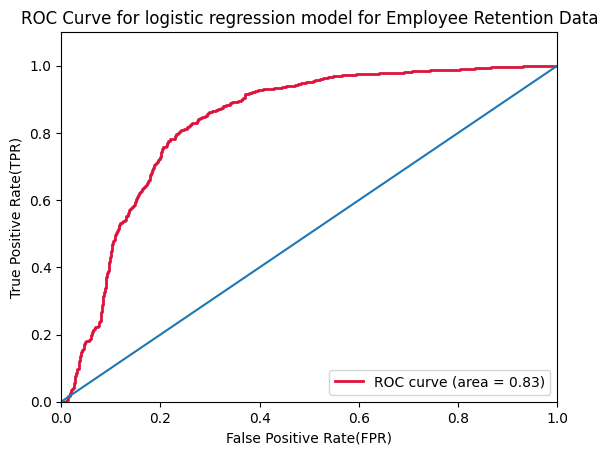

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline


fpr,tpr,_= roc_curve(y_test,y_prob_predict)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='crimson', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1])#, color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1])
plt.ylim([0.0, 1.1])
plt.xlabel('False Positive Rate(FPR)')
plt.ylabel('True Positive Rate(TPR)')
plt.title('ROC Curve for logistic regression model for Employee Retention Data')
plt.legend(loc="lower right")
plt.show()



In [14]:
# Printing the AUC_ROC score for actual and predicted probability y
print("AUC_ROC Score for logistic Regression Model:", roc_auc)

AUC_ROC Score for logistic Regression Model: 0.8326036451325937


The provided code generates an ROC (Receiver Operating Characteristic) curve to evaluate the performance of a logistic regression model applied to Employee Retention Data. Matplotlib is used to create the plot, with the false positive rate (FPR) on the x-axis and the true positive rate (TPR) on the y-axis. The area under the ROC curve (ROC AUC) is calculated using the roc_curve and auc functions from Scikit-learn. The resulting plot visualizes the trade-off between sensitivity and specificity for different classification thresholds of the logistic regression model. This evaluation helps assess the model's ability to distinguish between the two classes (employee retention and attrition) and its overall predictive performance.

### Task 1H: 10 points

Let's try for another model.
1. Define Random Forest. Don't yet fit the model.
2. Use Repeated stratified K Fold method with 5 splits, 3 repeats and roc_auc scoring.
3. Print the mean of roc_auc scores.
4. Fit the training data.
5. Predict class for testing data.
6. predict y test probability values from model.
7. Print the AUC_ROC score for actual and predict probability y.

Note: y test probablity values are for the event(ie 1, left)

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score


#1. Define Random Forest. Don't yet fit the model.
#2. Use Repeated stratified K Fold method with 5 splits, 3 repeats and roc_auc scoring.

#defining the random forest clasifier fro the sklearn library
Random_forest_model=RandomForestClassifier()

#applying k fold 
crossvalidation = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=42)


In [93]:
# 3. Print the mean of roc_auc scores.
# 4. Fit the training data.
# 5. Predict class for testing data.
# 6. predict y test probability values from model.
import numpy as np

#calculating ROC mean
roc_auc_scores = cross_val_score(Random_forest_model, X_train_scaled, y_train, scoring='roc_auc', cv=crossvalidation)

mean_roc_auc = np.mean(roc_auc_scores)

print("The mean of the AUC score is: " ,mean_roc_auc)

#fitting the model
Random_forest_model.fit(X_train_scaled,y_train)

# Predict class for test data
y_predict = Random_forest_model.predict(X_test_scaled)

# predicting the probabilty for test data
y_prob_predict = Random_forest_model.predict_proba(X_test_scaled)[:,1]

The mean of the AUC score is:  0.9919709665487412


In [16]:
auc_score=roc_auc_score(y_test,y_prob_predict)

print("AUC score given and predicted probabailty of y: ",auc_score)

AUC score given and predicted probabailty of y:  0.8326036451325937


The provided code defines a Random Forest classifier using the RandomForestClassifier class from the Scikit-learn library. However, the model is not yet fitted to any data. Additionally, the code sets up a repeated stratified K-fold cross-validation method with 5 splits, 3 repeats, and scoring based on ROC AUC (Receiver Operating Characteristic Area Under the Curve). This cross-validation technique ensures robust evaluation of the Random Forest model's performance on the dataset.

The provided code computes the mean of the ROC AUC scores acquired from cross-validation with the Random Forest model. It then applies the Random Forest model to the training data, predicts the class labels for the testing data, and estimates the probability values for the test data. These probability values show the Random Forest model's likelihood of selecting the positive class (1).

The code produces the AUC (Area Under the Curve) score by comparing the actual test labels (y_test) to the Random Forest model's projected probability values (y_prob_predict). The AUC score measures a model's ability to differentiate between positive and negative classifications.

#comment your interpretations here.

## Task 2: NLP on  Email Data

Next up! This task involves applying NLP techniques on the data which consists of text from the news and their classification whether they are Fake news or Real News.

Simply run below cell to read and display the data

In [15]:
news_data = pd.read_csv("fake_or_real_news.csv")

news_data.head()

Unnamed: 0                                              title  \
0        8476                       You Can Smell Hillary’s Fear   
1       10294  Watch The Exact Moment Paul Ryan Committed Pol...   
2        3608        Kerry to go to Paris in gesture of sympathy   
3       10142  Bernie supporters on Twitter erupt in anger ag...   
4         875   The Battle of New York: Why This Primary Matters   

                                                text label  
0  Daniel Greenfield, a Shillman Journalism Fello...  FAKE  
1  Google Pinterest Digg Linkedin Reddit Stumbleu...  FAKE  
2  U.S. Secretary of State John F. Kerry said Mon...  REAL  
3  — Kaydee King (@KaydeeKing) November 9, 2016 T...  FAKE  
4  It's primary day in New York and front-runners...  REAL

### Task 2A: 5 points

1. Map the 'label' variable to 1-Fake and 0-Real.
2. Display a pie chart for the distribution of two categories of news. 
3. The pie chart should have title, the name and percentage of each category and startangle equal to 90.
4. Use explode feature for Fake category.

### Task 2B: 10 points
Now its time to clean the text to keep as many as useful words for further processing.

1. Remove special caharacters from the text.
2. Remove stop words.
3. Lemmatize the words.
4. Keep only text that is alphabet and the length of the word is greater than 2.

Note: Remember to lower the text before applying these cleaning techniques.

### Task 2C: 5 points

1. Split the data into training/testing with 80-20 ration and stratify
2. Also define startified kfold with 3 splits.

### Task 2D: 5 points

1. Use Bag of words technique with bigrams and apply to trainign and testing data.
2. Use TF-IDF technique with bigrams and apply to training and testing data.

TIP: Remember to store the modified data into different variables.
Note: Remember to only transform the testing data.

### Task 2E: 10 points
Now comes the main part where we will be applying machine learning algorithms on the cleaned, transformed data. 

1. Apply Multinomial Naive Bayes and Logistic Regression for both bag of words and TF-IDF transformed data.
2. Use Accuracy and F1 evaluation metric
3. Display the scores in a tabular format.
4. Perform hyper-parameter tuning for each algorithm with grid search and use the best estimated model from each type to test the data further and print the accuracy score.
5. Display the confusion matrix.

Note: Look at the F1 score while selecting the bag of words and TFIDF technique for each algorithm.

### Task 2F: 5 points
1. Display a bar chart for the accuracy scores for each model.
2. Display the percentages on the bar.
3. Apply opacity on the bars according to the scores(1 being highest).
4. Display proper title and axes names.
5. IMP: Interpret your results and conclusion.

Note: Adjust ylims to clearly see the difference.

### Programming Assignment Details

1. You can use libraries: Numpy, Pandas, Scikit-Learn, Matplotlib and Seaborn
2. Explain each and every task that is performed for each cell. USE MARKDOWNS!!! Still you need to comment your code.
3. If using any resource (books, internet), please make sure that you cite it within that cell.
4. Do not rename the dataset_files.

###  Submission details
Fill your name and ID in the jupyter notebook for each group member in the following format:

1. First Student Name and ID: ABC 1001XXXXXX
2. Second Student Name and ID: DEF 1002XXXXXX
3. Third Student Name and ID: GHI 1003XXXXXX

Name your submission files:

yourLastName_Last4digitsofyourID.ipynb

EG: abc_1234_def_5678_xyz3819.ipynb

### NOTE: Only one team member will submit the file.